<a href="https://colab.research.google.com/github/Aleks-cmyk/neural-netw/blob/master/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота 4

студентки КН-31

Мензатюк Олександри

# Завдання 1
На основі документу вирішити завдання класифікації для набору даних Fashion MNIST.

Моделювання провести із використанням нейронної мережі (Flatten & Dense layers).

In [31]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
from tensorflow.keras.datasets import fashion_mnist

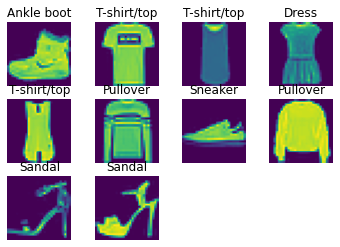

In [33]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i in range(len(class_names)):
  ax = plt.subplot(3, 4, i+1)
  plt.imshow(x_train[i])
  plt.title(class_names[y_train[i]])
  plt.axis(False)

In [34]:
tf.random.set_seed(42)

x_train = x_train / 255.0
x_test = x_test / 255.0

model_fashion_mnist = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax'),
])

model_fashion_mnist.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

training = model_fashion_mnist.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

# Завдання 2
Здійснити вибір оптимального кроку градієнтного алгоритму (learning_rate), а також побудову Confusion Matrix.


In [35]:
tf.random.set_seed(42)

model_fashion_mnist2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_fashion_mnist2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_fashion_mnist2.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test), callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

# Завдання 
Для моделювання використати 3 класи індекси яких взяти відповідно до номеру у списку групи.

In [43]:
tf.random.set_seed(42)

def data_filter_normalize(x, y):
  x_sorted, y_sorted = [], []

  for i in range(len(y)):
    if y[i] == 5:
      x_sorted.append(x[i])
      y_sorted.append(0)
    elif y[i] == 6:
      x_sorted.append(x[i])
      y_sorted.append(1)
    elif y[i] == 7:
      x_sorted.append(x[i])
      y_sorted.append(2)

  x_sorted = tf.constant(x_sorted, dtype="float32") / 255.0
  y_sorted = tf.constant(y_sorted)

  return x_sorted, y_sorted


x_train_sort_norm, y_train_sort_norm = data_filter_normalize(x_train, y_train)
x_test_sort_norm, y_test_sort_norm = data_filter_normalize(x_test, y_test)

model_fashion_mnist_final = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(5, activation='relu'),
  tf.keras.layers.Dense(5, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax'),
])

model_fashion_mnist_final.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])
history = model_fashion_mnist_final.fit(x_train_sort_norm, y_train_sort_norm, epochs=10, validation_data=(x_test_sort_norm, y_test_sort_norm))

Epoch 1/10
563/563 [==============================] - 3s 4ms/step - loss: 0.8550 - accuracy: 0.6847 - val_loss: 0.5718 - val_accuracy: 0.8247
Epoch 2/10
563/563 [==============================] - 2s 4ms/step - loss: 0.4697 - accuracy: 0.8739 - val_loss: 0.3655 - val_accuracy: 0.9140
Epoch 3/10
563/563 [==============================] - 2s 4ms/step - loss: 0.3095 - accuracy: 0.9046 - val_loss: 0.2430 - val_accuracy: 0.9253
Epoch 4/10
563/563 [==============================] - 3s 6ms/step - loss: 0.2328 - accuracy: 0.9178 - val_loss: 0.1937 - val_accuracy: 0.9353
Epoch 5/10
563/563 [==============================] - 3s 5ms/step - loss: 0.1989 - accuracy: 0.9254 - val_loss: 0.1698 - val_accuracy: 0.9417
Epoch 6/10
563/563 [==============================] - 2s 4ms/step - loss: 0.1788 - accuracy: 0.9329 - val_loss: 0.1546 - val_accuracy: 0.9450
Epoch 7/10
563/563 [==============================] - 2s 4ms/step - loss: 0.1653 - accuracy: 0.9383 - val_loss: 0.1452 - val_accuracy: 0.9470
Epoch 

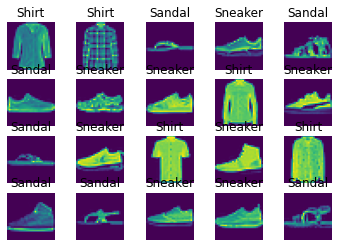

In [44]:
y_predicted = model_fashion_mnist_final.predict(x_test_sort_norm)

class_names = ['Sandal', 'Shirt', 'Sneaker']

for i in range(20):
  ax = plt.subplot(4, 5, i + 1)
  plt.imshow(x_test_sort_norm[i])
  plt.title(class_names[np.where(y_predicted[i] == np.amax(y_predicted[i]))[0][0]])
  plt.axis(False)

# Висновок
В результаті виконання лаьораторної роботи було побудовано нейромережу для вирішення завдання клавифікації. Було виявлено, що для хорошої роботи нейромережі, необхідно спочатку нормалізувати дані. Також експериментальним шляхом було виявлено оптимальний крок градієнту і застосовано його на остаточній нейромережі, яка проводить класифікацію на 3 вибраних класах. Точність навчання досягла значення 0.953, що є дуже хорошим результатом. Потім було візуалізовано результати навчання за допомогою тестового набору даних.